# ESG Scores S&P 500

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from tabulate import tabulate





ModuleNotFoundError: No module named 'tabulate'

In [8]:
data = pd.read_csv('/Users/danielharrod/git/S&P 500 ESG Risk Ratings /SP 500 ESG Risk Ratings.csv')
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [9]:
data.shape
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,21.422633,5.678984,6.673903,9.045035,1.896074
std,7.264458,5.339965,2.201049,3.813788,0.940748
min,7.000000,0.000000,3.000000,1.100000,0.000000
25%,16.000000,1.500000,5.000000,6.600000,1.000000
50%,21.000000,3.800000,6.000000,8.700000,2.000000
75%,26.000000,8.900000,7.700000,11.600000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


In [10]:
def check(data):
    l = []
    columns = data.columns
    for col in columns:
        instances = data[col].count()
        dtypes = data[col].dtype
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        duplicates = data.duplicated().sum()
        l.append([col, dtypes, instances, unique, sum_null, duplicates])
    data_check = pd.DataFrame(l, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return data_check

# check(data)

# Remove rows with null values in Sector and Total ESG Risk Score
data = data.dropna(subset=['Sector','Total ESG Risk score'])

# Reset the index after removing rows
data = data.reset_index(drop=True)

print(f"Shape of the dataset: {data.shape}")

check(data)

Shape of the dataset: (432, 15)


,column,dtype,instances,unique,sum_null,duplicates
0,Symbol,object,432,432,0,0
1,Name,object,432,432,0,0
2,Address,object,432,432,0,0
3,Sector,object,432,11,0,0
4,Industry,object,432,108,0,0
5,Full Time Employees,object,427,358,5,0
6,Description,object,432,432,0,0
7,Total ESG Risk score,float64,432,36,0,0
8,Environment Risk Score,float64,432,134,0,0
9,Governance Risk Score,float64,432,91,0,0


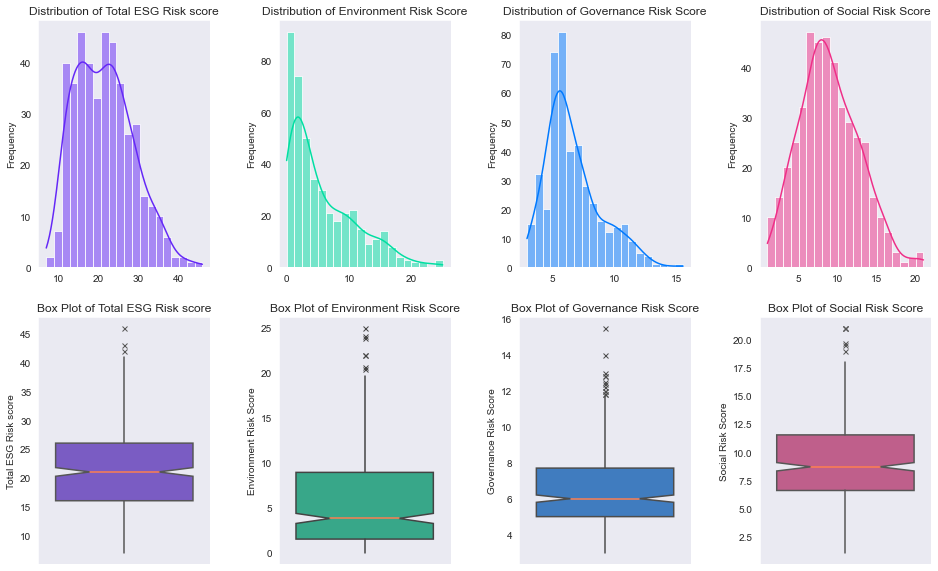

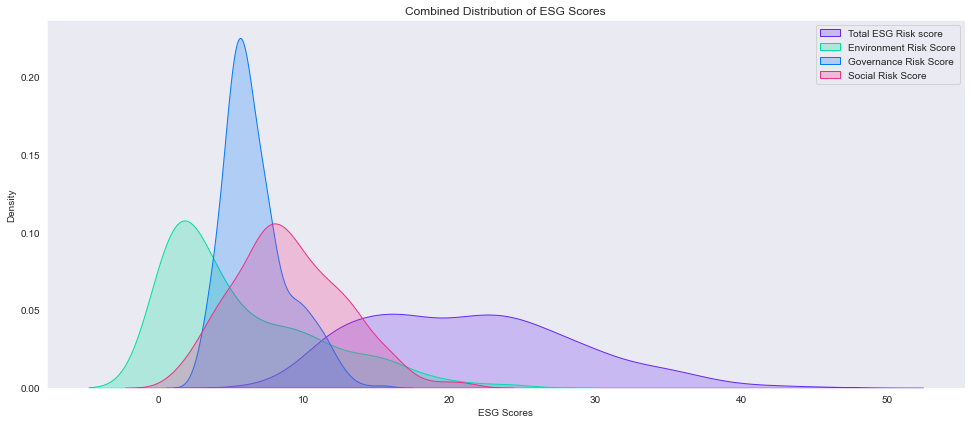

Summary Statistics for ESG Scores:


NameError: name 'tabulate' is not defined

In [13]:
# Subplots for Histograms and scatter plots
esg_scores = data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

# Set style
sns.set_style("dark")

# Define a custom color palette
colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]


# Create subplots for histograms and distribution plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

# Iterate through each ESG score column
for i, col in enumerate(esg_scores.columns):
    # Plot histogram
    sns.histplot(
        esg_scores[col], 
        bins=20, 
        kde=True, 
        ax=axes[0, i], 
        color=colors[i]
    )
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].set_title(f'Distribution of {col}')


    # Plot box plot with the same color
    sns.boxplot(
        y=esg_scores[col], 
        ax=axes[1, i], 
        color=colors[i],
        saturation=0.5,
        notch=True, 
        showcaps=False,
        flierprops={"marker": "x"},
        medianprops={"color":"coral"}
    )
    axes[1, i].set_ylabel(col)
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Box Plot of {col}')


#  Create a single KDE plot for all ESG scores
plt.figure(figsize=(13.6, 6))

# Iterate through each ESG score column and plot its KDE
for i, col in enumerate(esg_scores.columns):
    sns.kdeplot(
        esg_scores[col],
        color=colors[i], 
        label=col, 
        fill=True
    )
    
# Add labels and a title
plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores')

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()


# Identify and display outliers
outliers = {}

for col in esg_scores.columns:
    Q1 = esg_scores[col].quantile(0.25)
    Q3 = esg_scores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = esg_scores[(esg_scores[col] < lower_bound) | (esg_scores[col] > upper_bound)]
    outliers[col] = col_outliers

# Display summary statistics as a nice table
summary_stats = esg_scores.describe()
print("Summary Statistics for ESG Scores:")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

# Display outliers as nice tables
for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    print(tabulate(outlier_df, headers='keys', tablefmt='pretty'))